# Compute  PCA : Method 1 : Clustering

- use PCA scikit learn from scikit learn

- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab
- creation date : 2022/12/28
- last update : 2022/12/30

In [1]:
# Import some generally useful packages

import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx

from mpl_toolkits.mplot3d import axes3d  

from matplotlib.backends.backend_pdf import PdfPages

%matplotlib inline
import pandas as pd
from itertools import cycle, islice

from astroML.utils.decorators import pickle_results


In [2]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 6),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)

In [3]:
from sklearn.cluster import KMeans

In [4]:
from astropy.io import fits
import copy

In [5]:
filename = "datatools/pcamethod1_SL_eigenvectorandcoeff.fits"
hdu = fits.open(filename)

In [6]:
hdu.info()

Filename: datatools/pcamethod1_SL_eigenvectorandcoeff.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   (6362, 553)   float64   
  1                1 ImageHDU         8   (10, 550)   float64   
  2                1 ImageHDU         8   (6361, 10)   float64   


In [7]:
data1=hdu[0].data
hdr1 = hdu[0].header
hdr1

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 6362                                                  
NAXIS2  =                  553                                                  
EXTEND  =                    T                                                  
DATAWLS = 'data[0,1:]'                                                          
DATALLAV= 'data[1,1:]'                                                          
DATALLST= 'data[2,1:]'                                                          
DATAFL  = 'data[3:,1:]'                                                         
DATANUM = 'data[3:,0]'                                                          
COMMENT Spectra of StarLight                                                    

In [8]:
data2=hdu[1].data
hdr2 = hdu[1].header
hdr2

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   10                                                  
NAXIS2  =                  550                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
COMMENT PCA method 1 spectra coefficients                                       

In [9]:
data3=hdu[2].data
hdr2 = hdu[2].header
hdr2

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 6361                                                  
NAXIS2  =                   10                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
COMMENT PCA method 1 Eigen Vectors                                              

In [10]:
NSED = data1.shape[0]-3
NWL = data1.shape[1]-1

In [11]:
wavelengths = data1[0,1:] 
flambdas_average = data1[1,1:] 
flambdas_std = data1[2,1:] 
spec = data1[3:,1:] 
all_numbers = data1[3:,0] 

In [12]:
#flux = dfluxnorm*flambdas_std +  flambdas_average

/var/folders/rk/cnrspsj13_3cgmh8p4m_mxww0000gp/T/ipykernel_48820/1659706449.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['{:.0f}'.format(x) for x in current_values])


Text(0.5, 1.0, 'Flux average')

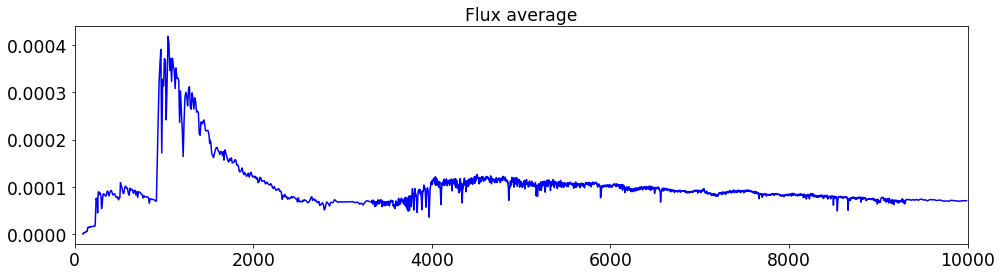

In [13]:
plt.figure(figsize=(16,4))
plt.plot(wavelengths,flambdas_average,'b-')
plt.xlim(0.,10000.)
current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:.0f}'.format(x) for x in current_values])
plt.title("Flux average")

In [14]:
spec.shape

(550, 6361)

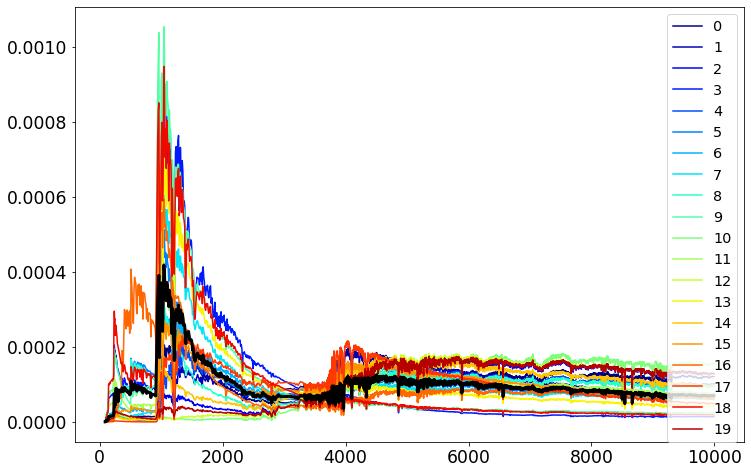

In [15]:
# wavelength bin colors
NTOPLOT=20
jet = plt.get_cmap('jet')
cNorm = colors.Normalize(vmin=0, vmax=NTOPLOT)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
all_colors = scalarMap.to_rgba(np.arange(NTOPLOT), alpha=1)


fig = plt.figure(figsize=(12, 8))

for idx in np.arange(20):
    plt.plot(wavelengths,spec[idx,:],color=all_colors[idx],label=str(idx))

plt.legend()
spec_mean = spec.mean(0)
plt.plot(wavelengths,spec_mean,"k-",lw=3)
#plt.ylim(0,50.)

# Clustering

https://scikit-learn.org/stable/modules/clustering.html

## Clustering from PCA coefficients

In [16]:
#X = copy.deepcopy(data2[:,:5])
X = copy.deepcopy(data2)

In [17]:
X.shape

(550, 10)

In [18]:
km = KMeans(n_clusters=30)
#km = KMeans(n_clusters=3, verbose=1)
estimator = km.fit(X)
print("centroids: ", km.cluster_centers_)
print("labels: ", km.labels_)

centroids:  [[ 4.04960477e-03 -1.07621434e-03 -5.87681879e-04 -2.69719399e-04
  -1.50480481e-04 -3.22073778e-05 -2.37828904e-05 -1.76982222e-05
  -2.99302678e-05  3.44518694e-06]
 [-3.61772650e-03  4.82053625e-04 -2.41205922e-04 -9.78186704e-05
   8.23513202e-05 -3.17204828e-05  4.34033699e-05 -9.74208345e-06
   4.51962560e-06 -2.89844615e-05]
 [ 6.65084279e-04  1.06191308e-04 -5.57827474e-04 -4.66079184e-05
  -8.45610070e-07 -6.28229048e-05  2.35315861e-05  9.42298864e-06
   1.46164075e-07 -9.12903445e-06]
 [ 7.04455107e-03  2.67745596e-03  1.57901034e-03 -9.90362135e-04
  -2.24810694e-04  3.16738250e-04 -4.23376160e-05  7.14935791e-05
  -7.92636439e-06 -1.77760779e-05]
 [-2.47711264e-03 -6.06724221e-04  3.71009902e-04  4.23670528e-05
  -1.14070932e-06  5.74562568e-05 -3.00623395e-05 -1.99016713e-05
   1.15023060e-05 -3.10212731e-05]
 [ 3.57397129e-03  1.99766641e-03  7.58371019e-04 -1.74875831e-04
   3.90821095e-05  3.18899055e-05  1.40116869e-05  2.46385655e-05
  -7.99996209e-06  1.

In [19]:
mydict = {i: np.where(km.labels_ == i)[0] for i in range(km.n_clusters)}
#my_dict = {km.cluster_centers_[i, 0]: np.where(km.labels_ == i)[0] for i in range(km.n_clusters)}

In [20]:
mydict

{0: array([ 33,  36,  38,  45,  85,  98, 164, 205, 239, 258, 272, 299, 368,
        369, 370, 382, 395, 409, 440, 447, 469, 534, 536, 541, 547]),
 1: array([ 14,  63,  66, 100, 107, 167, 170, 187, 204, 218, 224, 231, 234,
        301, 367, 372, 406, 417, 444, 468, 487, 490, 505]),
 2: array([  5,  11,  89, 103, 109, 127, 132, 175, 184, 196, 217, 244, 267,
        283, 315, 338, 354, 386, 394, 430, 437, 476, 486, 498, 519, 542]),
 3: array([413, 533]),
 4: array([  4,  28,  77,  93, 123, 135, 203, 214, 235, 260, 270, 277, 293,
        298, 377, 403, 474, 548]),
 5: array([ 81, 104, 162, 197, 307, 310, 329, 343, 408, 441, 489, 525]),
 6: array([  2,  10,  12,  19,  24,  84, 106, 137, 145, 155, 179, 180, 192,
        194, 198, 200, 201, 220, 221, 223, 240, 271, 279, 325, 327, 328,
        333, 337, 348, 349, 355, 357, 379, 384, 388, 389, 412, 419, 426,
        427, 434, 453, 464, 465, 479, 481, 495, 499, 514, 523, 527, 529,
        531, 532, 549]),
 7: array([  7,  13,  25,  52,  71,  72,

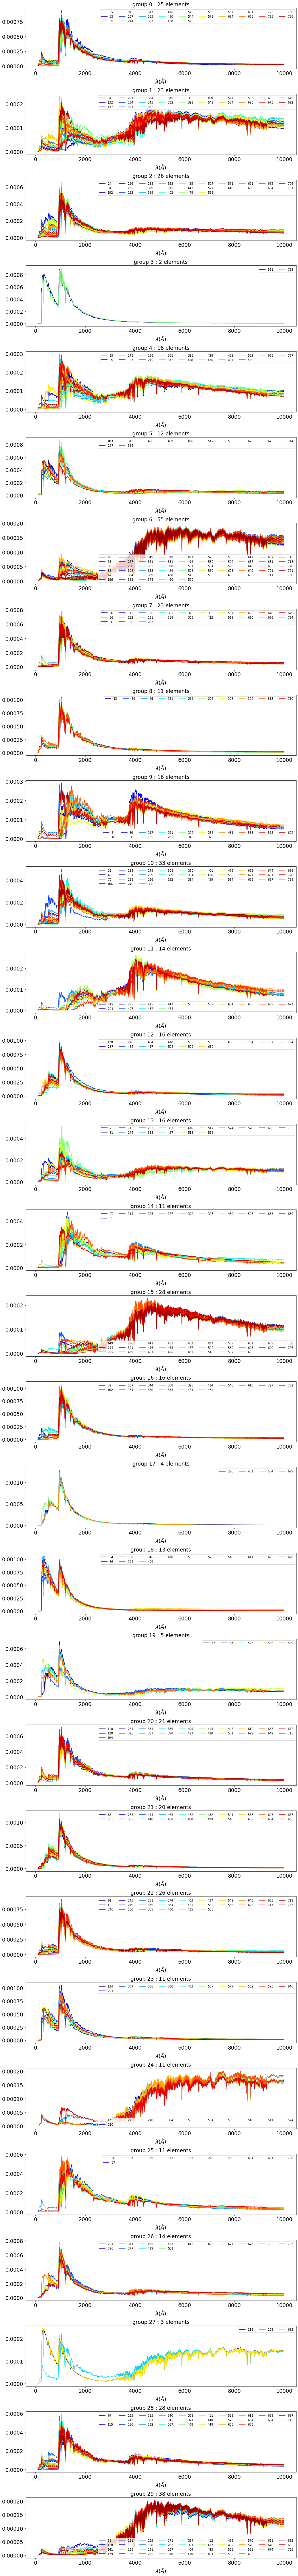

In [21]:
fig = plt.figure(figsize=(14, km.n_clusters*4))

for icluster in range(km.n_clusters):
    ax=fig.add_subplot(km.n_clusters,1,1+icluster)
    
    the_group = mydict[icluster]

    NTOPLOT=len(the_group)
    jet = plt.get_cmap('jet')
    cNorm = colors.Normalize(vmin=0, vmax=NTOPLOT)
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
    all_colors = scalarMap.to_rgba(np.arange(NTOPLOT), alpha=1)
    
    icount=0
    for idx in the_group:
        the_num=all_numbers[idx]
        the_label=f"{the_num:.0f}"
        ax.plot(wavelengths,spec[idx,:],color=all_colors[icount],label=the_label)
        icount+=1
    ax.set_title(f"group {icluster} : {NTOPLOT} elements")
    ax.set_xlabel("$\lambda (\AA)$ ")
    ax.legend(loc="best",ncol=10,fontsize=10)
        
        
plt.tight_layout()
    


### Clustering from Spectra

In [22]:
X = copy.deepcopy(spec)

In [23]:
km = KMeans(n_clusters=30)
#km = KMeans(n_clusters=3, verbose=1)
estimator = km.fit(X)
print("centroids: ", km.cluster_centers_)
print("labels: ", km.labels_)

centroids:  [[2.14250057e-06 2.36734686e-06 2.46653265e-06 ... 2.31132421e-05
  2.30795812e-05 2.30343970e-05]
 [1.81369980e-07 2.01624098e-07 2.15040192e-07 ... 1.22780122e-04
  1.22917646e-04 1.22764700e-04]
 [6.23618436e-07 6.73023144e-07 6.95073146e-07 ... 4.66257780e-05
  4.65907758e-05 4.65225365e-05]
 ...
 [1.90265899e-07 2.11175211e-07 2.23523005e-07 ... 1.05215041e-04
  1.05179814e-04 1.05466345e-04]
 [1.94607279e-08 2.35433127e-08 2.69125191e-08 ... 1.72822806e-04
  1.73332184e-04 1.73069847e-04]
 [4.23433765e-07 4.47399078e-07 4.57980407e-07 ... 3.06074436e-05
  3.06090787e-05 3.05992217e-05]]
labels:  [18  5  1 13 23  3 11 12  9 13  8 26 10 25 23 11 20  5 13  8 20 10 13 25
  8 12  3  6 23 11  9 21 21  0  2 22  0 14 16 14 22  5 13 22  5 16 13  3
 13 19 19 25  2  2  2  3 11 10 19 22 21 11 29  1  7  5  1 11 10 27 13  2
 19  7 11 19  8  9 10  1 10 24  0  3  8 16 10 10  5 26 10  7 12 23 10 17
  5 28 16 18  1 28 18 20 24 10  1 18 10 12 29  9 25 15  2  9 25  3 22 11
  3  9  6 23 1

In [24]:
mydict = {i: np.where(km.labels_ == i)[0] for i in range(km.n_clusters)}

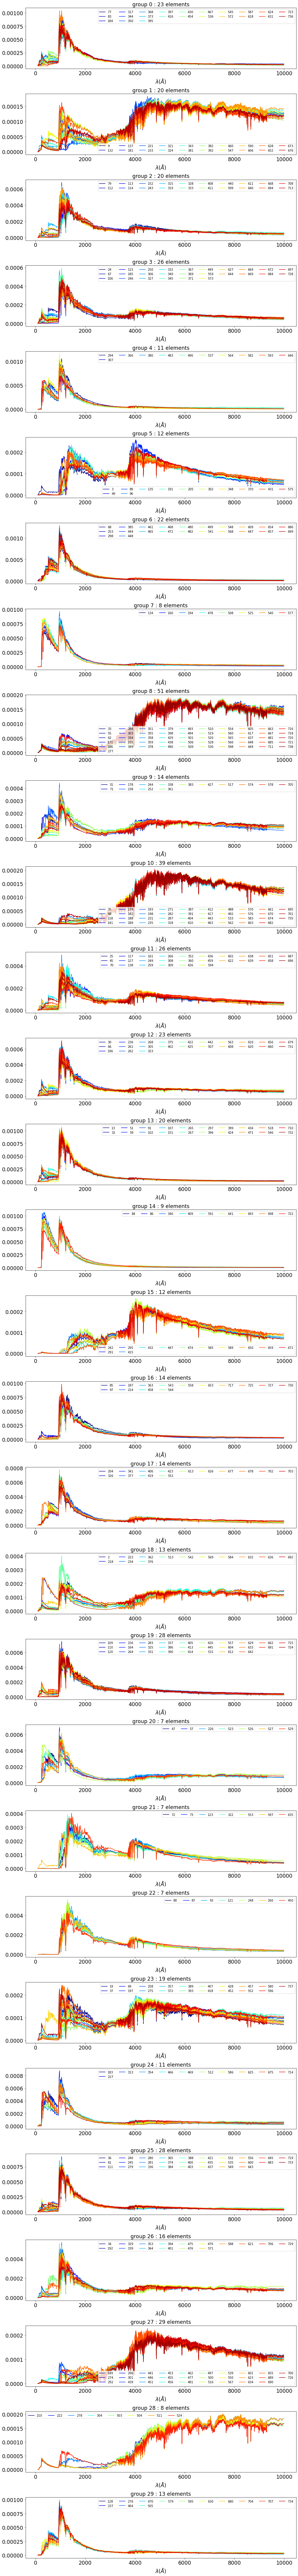

In [26]:
fig = plt.figure(figsize=(14, km.n_clusters*4))

for icluster in range(km.n_clusters):
    ax=fig.add_subplot(km.n_clusters,1,1+icluster)
    
    the_group = mydict[icluster]

    NTOPLOT=len(the_group)
    jet = plt.get_cmap('jet')
    cNorm = colors.Normalize(vmin=0, vmax=NTOPLOT)
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
    all_colors = scalarMap.to_rgba(np.arange(NTOPLOT), alpha=1)
    
    icount=0
    for idx in the_group:
        the_num=all_numbers[idx]
        the_label=f"{the_num:.0f}"
        ax.plot(wavelengths,spec[idx,:],color=all_colors[icount],label=the_label)
        icount+=1
    ax.set_title(f"group {icluster} : {NTOPLOT} elements")
    ax.set_xlabel("$\lambda (\AA)$ ")
    ax.legend(loc="best",ncol=10,fontsize=10)
        
        
plt.tight_layout()